In [2]:
import numpy as np
import pandas as pd 

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 


In [5]:
load_boston = pd.read_csv("/load_boston.csv")
load_boston = pd.DataFrame(load_boston)
x = load_boston.drop('SalePrice' , axis=1) # remove the target column
y = load_boston['SalePrice']

data = pd.DataFrame(x, columns=load_boston.columns[:-1])
data["SalePrice"] = y 
load_boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's


In [43]:
print(data.shape)

(506, 14)


In [44]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    float64
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    float64
 9   TAX        506 non-null    float64
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  SalePrice  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


In [45]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [46]:
data.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
SalePrice    0
dtype: int64

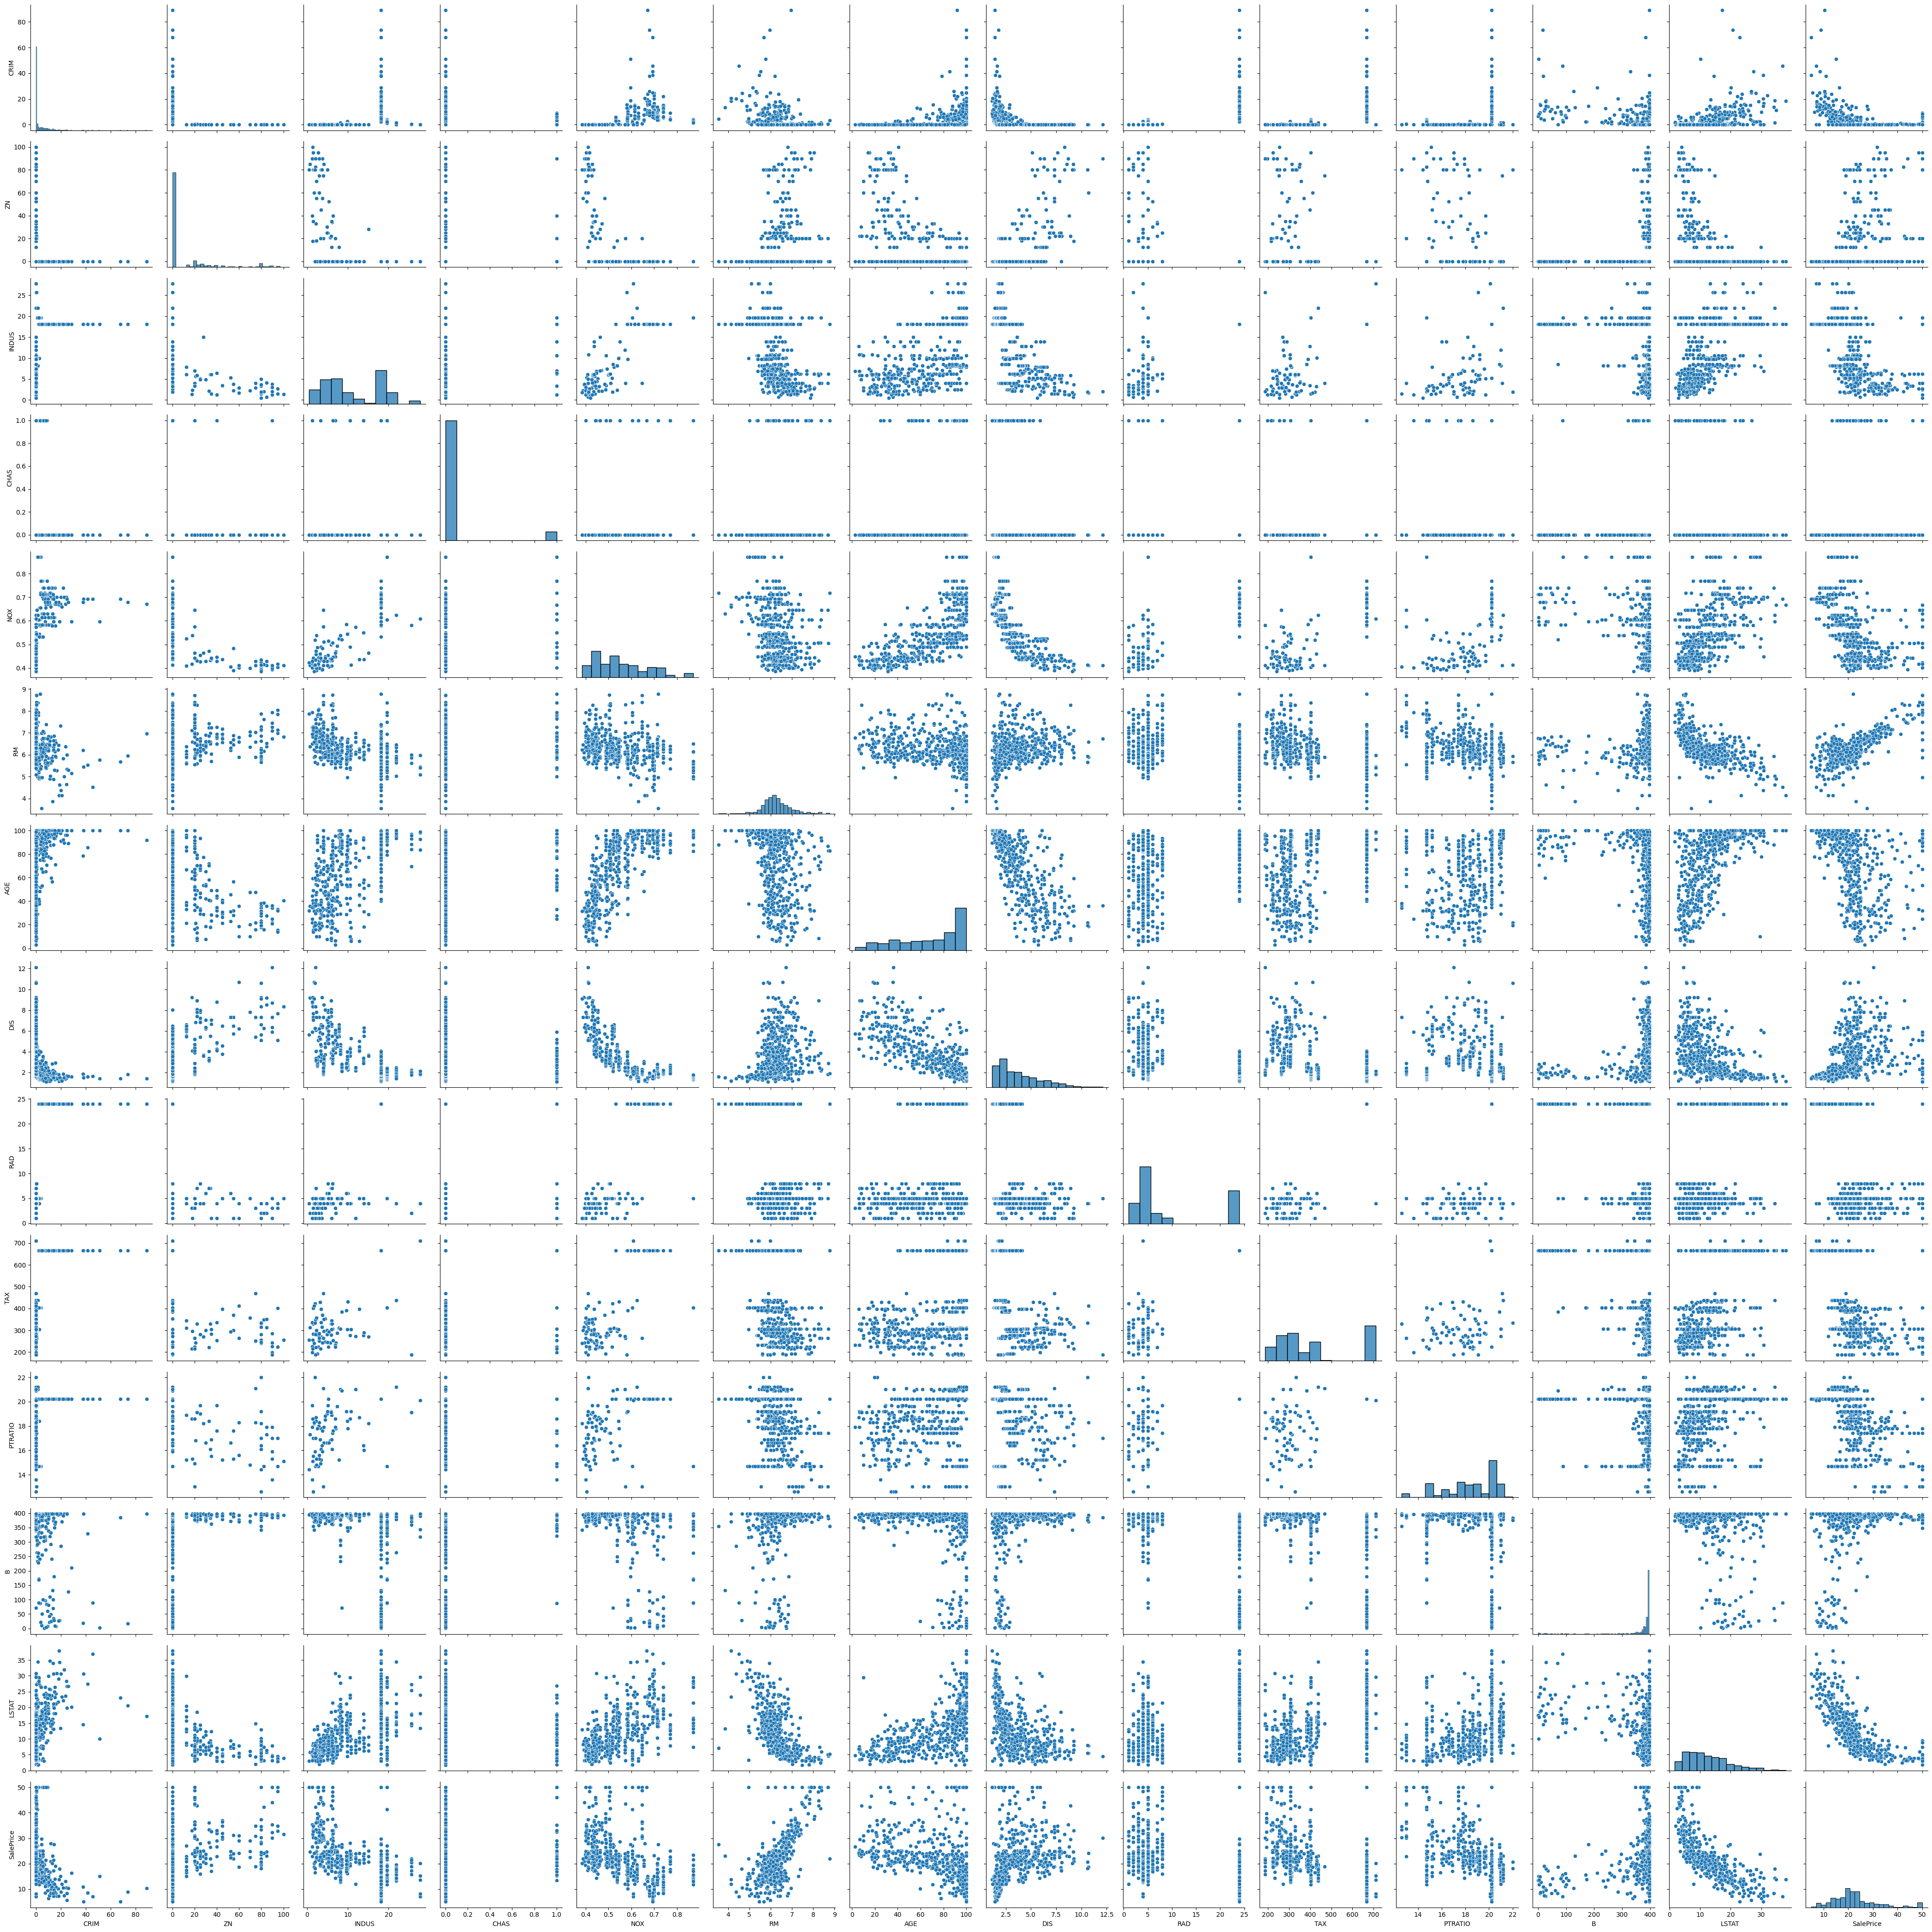

In [47]:
sns.pairplot(data, height = 3)
plt.tight_layout()

<ipython-input-51-49aabdaaf92b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

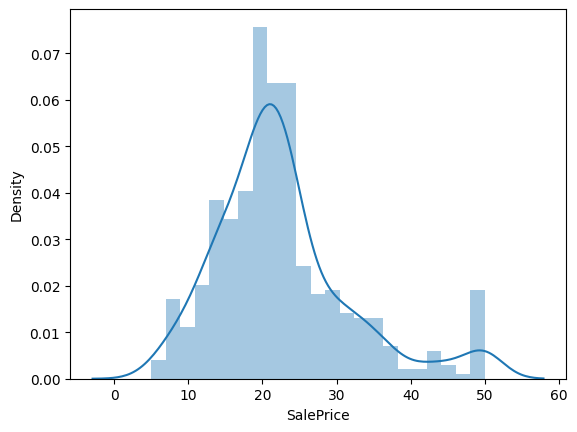

In [51]:
sns.distplot(data['SalePrice'])
#sns.histplot(data['SalePrice'])


In [52]:
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

Skewness: 1.108098
Kurtosis: 1.495197


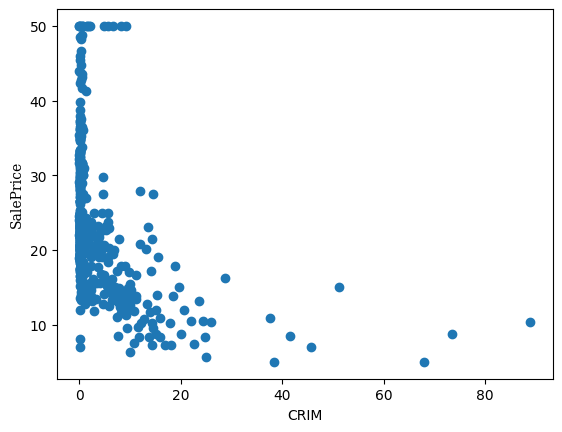

In [61]:
fig, ax = plt.subplots()
ax.scatter(x = data['CRIM'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize = 10, fontfamily='serif')
plt.xlabel('CRIM')
plt.show()

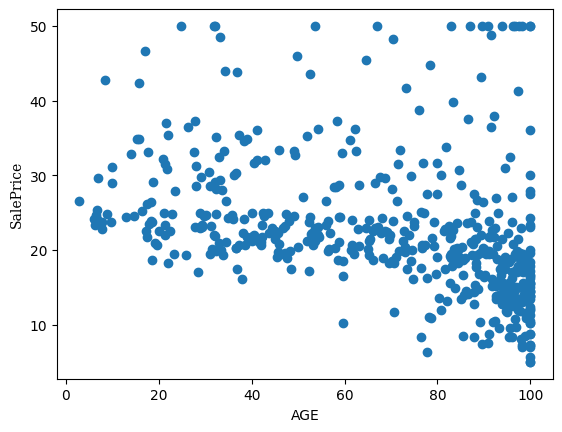

In [60]:
fig, ax = plt.subplots()
ax.scatter(x = data['AGE'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize = 10, fontfamily='serif')
plt.xlabel('AGE')
plt.show()

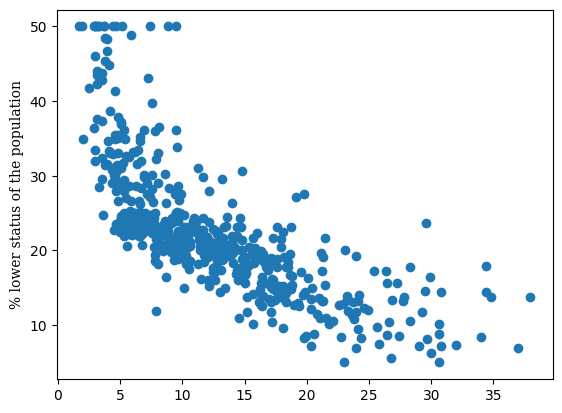

In [63]:
fig, ax = plt.subplots()
ax.scatter(x = data['LSTAT'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize = 10, fontfamily='serif')
plt.ylabel('% lower status of the population')
plt.show()

<ipython-input-72-65fa3ec923a7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'], kde=True, fit = norm);



 mu =  22.533 and sigma =  9.188 



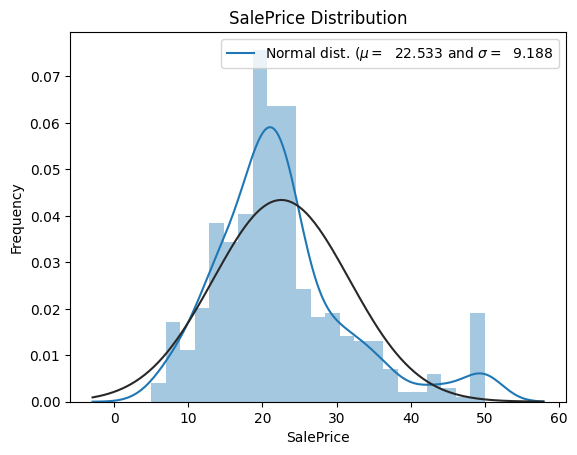

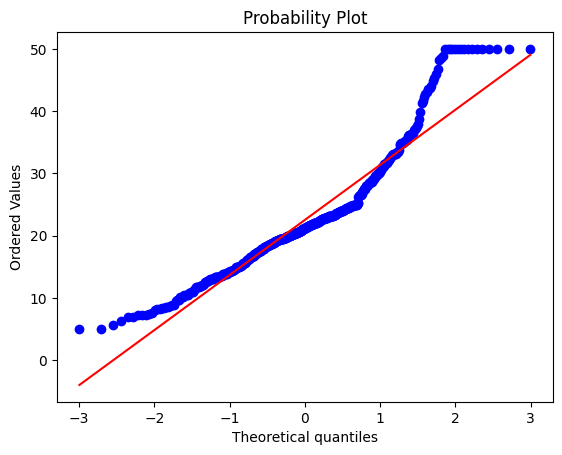

In [72]:
from scipy import stats 
from scipy.stats import norm, skew #for statistics purposes


sns.distplot(data['SalePrice'], kde=True, fit = norm);

(mu, sigma) = norm.fit(data['SalePrice'])
print('\n mu = {: .3f} and sigma = {: .3f} \n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {: .3f} and $\sigma=$ {: .3f}'.format(mu, sigma)],
           loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

#as well QQ-plot
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot = plt)
plt.show()

<ipython-input-76-34aec193c8ac>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'], kde=True, fit = norm);



 mu =  22.533 and sigma =  9.188 



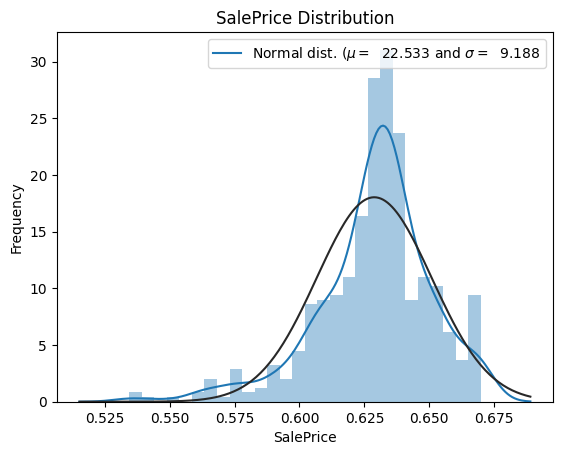

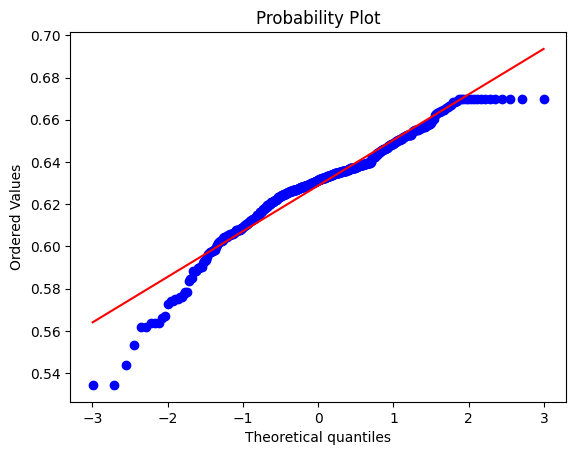

In [76]:
data['SalePrice'] = np.log1p(data['SalePrice'])

sns.distplot(data['SalePrice'], kde=True, fit = norm);
print('\n mu = {: .3f} and sigma = {: .3f} \n'. format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {: .3f} and $\sigma=$ {: .3f}'.format(mu, sigma)],
           loc = 'best')

plt.ylabel('Frequency')
plt.title("SalePrice Distribution")

fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

###Data Correlation

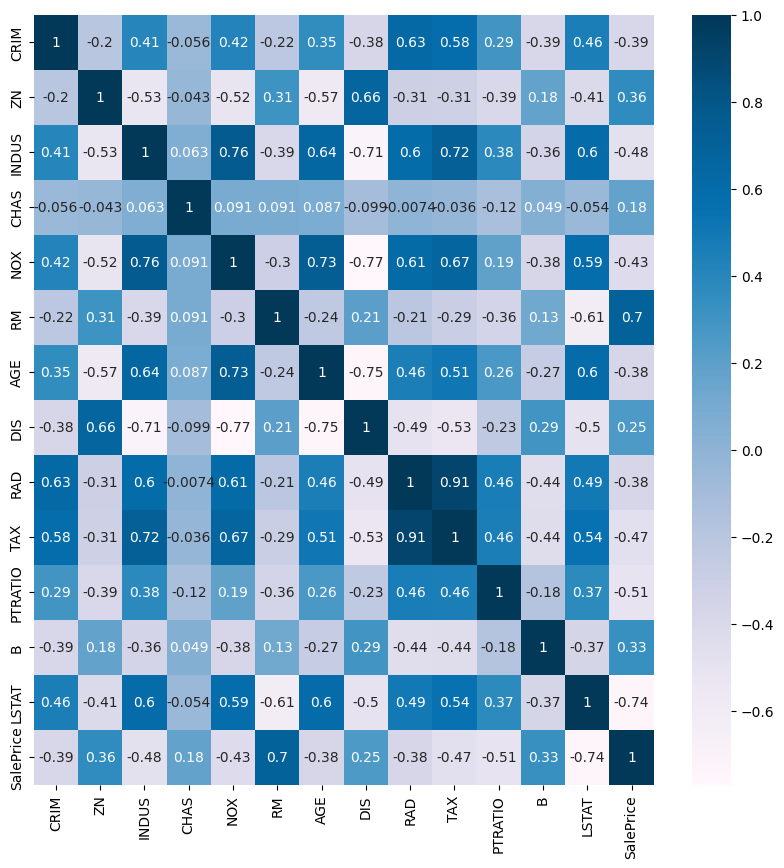

In [7]:
plt.figure(figsize = (10,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [10]:
from os import name
from operator import index
cor_target = abs(cor['SalePrice']) #absolute value of the correlation
relevent_features = cor_target[cor_target>0.2] #highly corelated features
names = [index for index, value in relevent_features.iteritems()] #getting names of the features
names.remove('SalePrice') #removing target features
print(names)
print(len(names))

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
12


<ipython-input-10-d440a11738bd>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  names = [index for index, value in relevent_features.iteritems()] #getting names of the features


###Model Building

In [12]:
from sklearn.model_selection import train_test_split

x = data.drop('SalePrice', axis = 1)
y = data['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [14]:
predictions = lr.predict(x_test)

print('Actual value of the house: ', y_test[0])
print('Model predicted value:', predictions[0])


Actual value of the house:  24.0
Model predicted value: 28.648960046324145


In [16]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(rmse)

4.638689926172818
